In [14]:
import instagram
from instagram.client import InstagramAPI
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
client_id='4c752d3964bb46138f4ad623ef9212bf'
client_secret = 'c428cbf5335a4027ab3851f52c8d4d46'
redirect_uri='https://www.hkbu.edu.hk/eng/main/index.jsp'
scope = ('basic','public_content')

In [16]:
service_url = 'https://api.instagram.com/oauth/authorize/?client_id='+client_id+'&redirect_uri='+redirect_uri+'&response_type=code'

print('Please open the url and copy it from browser')
print(service_url)

Please open the url and copy it from browser
https://api.instagram.com/oauth/authorize/?client_id=4c752d3964bb46138f4ad623ef9212bf&redirect_uri=https://www.hkbu.edu.hk/eng/main/index.jsp&response_type=code


In [18]:
new_service_url = input('Enter the url: ')

Enter the url: https://www.hkbu.edu.hk/eng/main/index.jsp?code=a9fb640e00104ea0808a4d7ee45a3039


In [19]:
#get user account information
code = new_service_url.split('code=')[1]
api = InstagramAPI(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
access_token = api.exchange_code_for_access_token(code)
access_token

('305553279.4c752d3.997fcceb020f4b9a9392de6ecb1864f7',
 {'id': '305553279',
  'username': 'ellencyl',
  'profile_picture': 'https://scontent.cdninstagram.com/vp/da39201d5817bbf61ef8e272dd1a5807/5C468957/t51.2885-19/s150x150/42078558_243519162997624_6531939229017047040_n.jpg',
  'full_name': 'Yilun CHEN',
  'bio': 'Hey',
  'website': '',
  'is_business': False})

In [20]:
user_id = access_token[1]['id']

In [21]:
api = InstagramAPI(access_token=access_token[0], client_secret=client_secret)
recent_media, next_ = api.user_recent_media(user_id=user_id, count=5)

resent_post = []
for media in recent_media:
    resent_post.append(media.caption)

In [22]:
#sample recent 5 post
resent_post

[None,
 Comment: ellencyl said "now things are getting serious",
 Comment: ellencyl said "Mom sweet mom",
 None,
 None]

In [23]:
#sample recent media
recent_media, next_ = api.user_recent_media()
photos = []
for media in recent_media:
    photos.append('<img src="%s"/>' % media.images['thumbnail'].url)

In [24]:
photos

['<img src="https://scontent.cdninstagram.com/vp/dcb274ad93815e1cb7307469f73cc264/5C5E6B6E/t51.2885-15/e35/s150x150/42429211_1852752504840398_3016164566783310840_n.jpg"/>',
 '<img src="https://scontent.cdninstagram.com/vp/bf5f1e1229f6bf7f4128508af5e27459/5C59DB23/t51.2885-15/e35/s150x150/42570241_1851512984896046_2233596493571546088_n.jpg"/>',
 '<img src="https://scontent.cdninstagram.com/vp/0e0251839809089b456bed505655e279/5C4AE3F9/t51.2885-15/e35/s150x150/41972320_1015152341998505_7164370164621474362_n.jpg"/>',
 '<img src="https://scontent.cdninstagram.com/vp/f84ff9f12639b6376a3fd6f701237a4c/5C583965/t51.2885-15/e35/c0.135.1080.1080/s150x150/41649942_250879592238111_8335499078928776662_n.jpg"/>',
 '<img src="https://scontent.cdninstagram.com/vp/b3ef7ac3e8fa43788893d7be65a3c395/5C5B66C6/t51.2885-15/e35/s150x150/42002710_1900906056692372_891812737478844724_n.jpg"/>',
 '<img src="https://scontent.cdninstagram.com/vp/72e87e6b56b5d9829e0d95bebec82bcc/5C4A8794/t51.2885-15/e35/s150x150/4008

In [25]:
#get like number of my recent post
#get comment number of my recent post
like_count = []
comment_count = []
for media in recent_media:
    like_count.append(media.like_count)
    comment_count.append(media.comment_count)

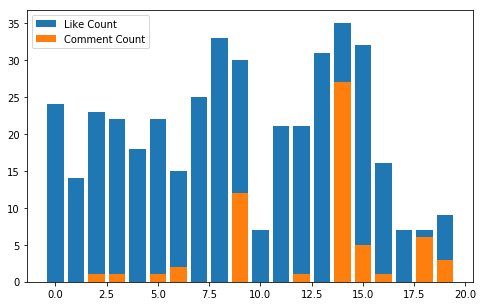

In [26]:
x = list(range(len(recent_media)))
ax, fig = plt.subplots(1,1, figsize=(8,5))
plt.bar(x, height=like_count, label='Like Count')
plt.bar(x, height=comment_count, label='Comment Count')
plt.legend()

In [27]:
api.media

instagram.client.InstagramAPI